# Test power analysis for independence tests

In [2]:
import sys
sys.path.append('..')
import numpy as np
from tqdm.notebook import tqdm
import pickle
import os
import pandas as pd

from synthetic_data import generate_data
from independence import opt_lambda, test_power
from plots import plot_samples, plot_power, type_I_boxplot, plot_cross_corr, plot_delay

from warnings import filterwarnings
filterwarnings('ignore')

### Test hyperparameters
We start by specifying some hyperparameters for all of our tests.

In [3]:
# number of trials and permutations
n_trials = 200
n_perms = 1000

# number of samples and number of points functional data samples are (randomly) observed and discretised
n_obs = 100
n_preds = 100

# define discretised period
upper_limit = 1
periods = [0.1]
pred_points = np.linspace(0, upper_limit, n_preds)

# number of Fourier basis functions and std of normal distribution of sampled coefficients
n_basis = 3
sd = 1

# statistical significance level
alpha = 0.05

In [4]:
# create folders to save results
if not os.path.exists('results'):
    os.mkdir('results')

if not os.path.exists('results/marginal'):
    os.mkdir('results/marginal')

if not os.path.exists('results/joint'):
    os.mkdir('results/joint')

if not os.path.exists('results/conditional'):
    os.mkdir('results/conditional')

## Marginal independence test

In [6]:
test = 'marginal'

# historical dependence is easier to detect the higher a is
a_list = [0, 0.2, 0.4, 0.6, 0.8, 1]

n_samples = [10, 20, 30]

We iterate over various values of $a$ and different kernels.

In [7]:
type_II_errors = {}

for p in periods:
    print('Period T:', p)
    type_II_errors[p] = {}
    for n_sample in tqdm(n_samples):
        print('Sample size:', int(n_sample))
        type_II_errors[p][int(n_sample)] = []
        for a in a_list:
            print('a:', a)
            # generate synthetic data
            X, Y = generate_data(dep=test, n_samples=int(n_sample), n_trials=n_trials, n_obs=n_obs, n_preds=n_preds, period=p, a=a, upper_limit=upper_limit, n_basis=n_basis, sd=sd)
            
            # conduct n tests
            power = test_power(X=X, Y=Y, n_trials=n_trials, n_perms=n_perms, alpha=alpha, K='K_ID', test=test)
            type_II_errors[p][n_sample].append(power)
            print('Test power:', power)
            print('----------')
        print('----------')
    
power_hist = open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'wb')
pickle.dump(type_II_errors, power_hist)
power_hist.close()

Period T: 0.1


  0%|          | 0/3 [00:00<?, ?it/s]

Sample size: 10
a: 0
Test power: 0.045
----------
a: 0.2
Test power: 0.64
----------
a: 0.4
Test power: 0.6
----------
a: 0.6
Test power: 0.6
----------
a: 0.8
Test power: 0.64
----------
a: 1
Test power: 0.69
----------
----------
Sample size: 20
a: 0
Test power: 0.035
----------
a: 0.2
Test power: 0.985
----------
a: 0.4
Test power: 0.97
----------
a: 0.6
Test power: 0.96
----------
a: 0.8
Test power: 0.955
----------
a: 1
Test power: 0.965
----------
----------
Sample size: 30
a: 0
Test power: 0.04
----------
a: 0.2
Test power: 1.0
----------
a: 0.4
Test power: 1.0
----------
a: 0.6
Test power: 1.0
----------
a: 0.8
Test power: 1.0
----------
a: 1
Test power: 1.0
----------
----------


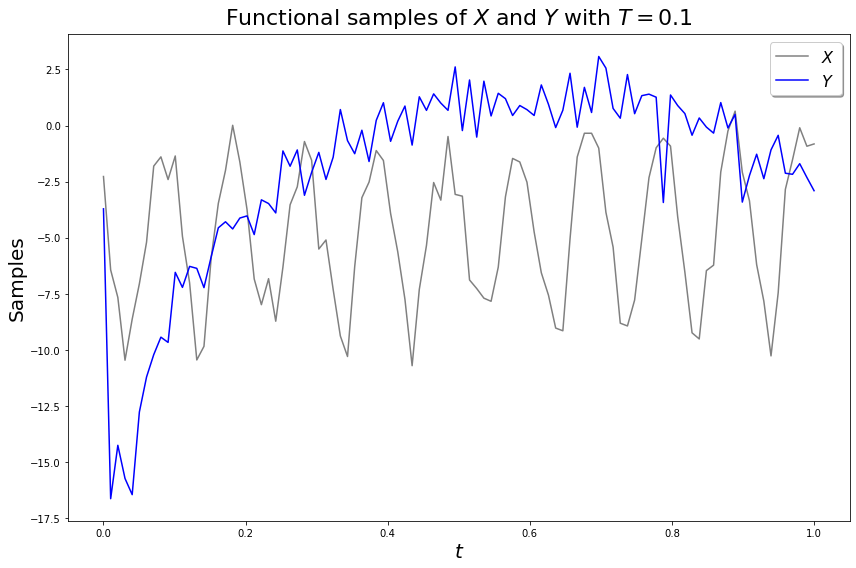

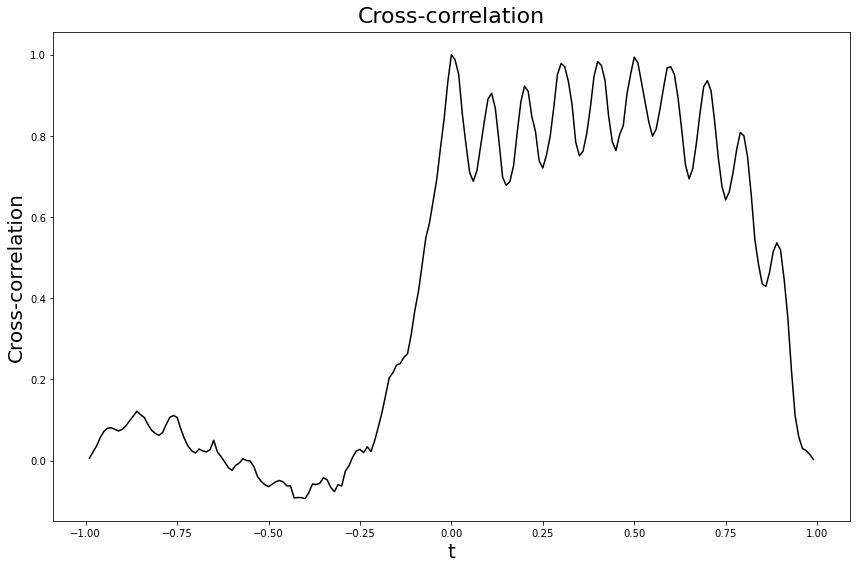

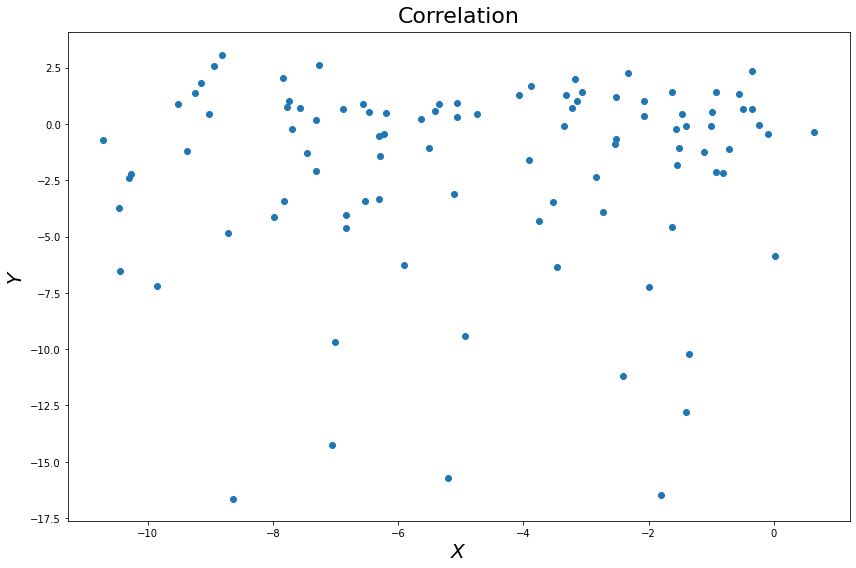

In [10]:
# plot n samples
p = 0.1
a = 1
X, Y = generate_data(dep=test, n_samples=20, n_trials=1, n_obs=100, n_preds=100, period=p, a=a, upper_limit=1, n_basis=3, sd=1)
n = 1
lag = 3

#np.savetxt("X.csv", X, delimiter=",")
#np.savetxt("Y.csv", Y, delimiter=",")

#X = np.genfromtxt("X_CCM.csv", delimiter=",")
#Y = np.genfromtxt("Y_CCM.csv", delimiter=",")

plot_samples(X[:n], Y[:n], pred_points, upper_limit, p)
plot_cross_corr(X[:n].squeeze(), Y[:n].squeeze(), p)
plot_delay(X[:n].squeeze()[lag:], Y[:n].squeeze()[:-lag], p)

In [17]:
type_II_errors = pickle.load(open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'rb'))

In [11]:
type_II_errors

{0.1: {10: [0.045, 0.64, 0.6, 0.6, 0.64, 0.69],
  20: [0.035, 0.985, 0.97, 0.96, 0.955, 0.965],
  30: [0.04, 1.0, 1.0, 1.0, 1.0, 1.0]}}

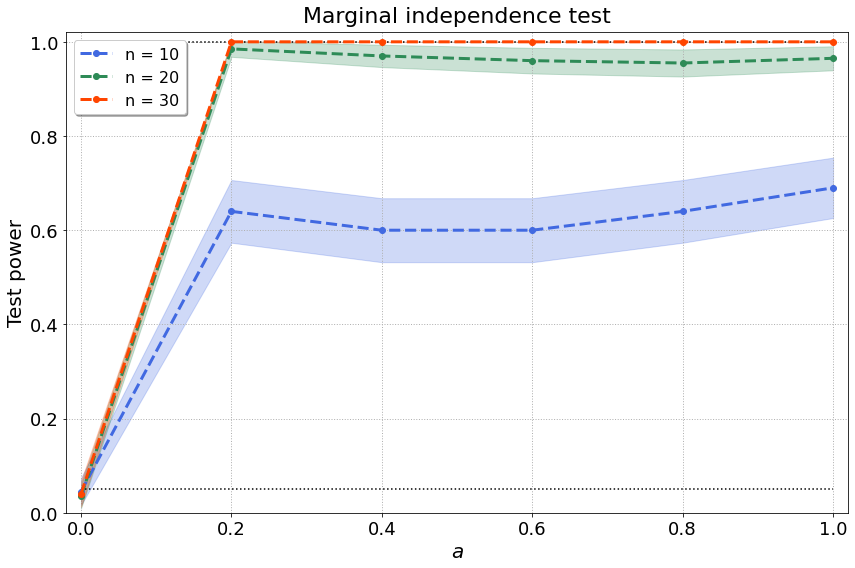

In [12]:
# power over strength of dependence
plot_power(type_II_errors, n_samples, a_list, n_trials, test, periods)

## Joint independence test

In [13]:
test = 'joint'

# number of variables in network
n_vars = 4

# historical dependence is easier to detect the higher a is
a_list = [0, 0.2, 0.4, 0.6, 0.8, 1]

n_samples = [10, 20, 30]

upper_limit = 1
pred_points = np.linspace(0, upper_limit, n_preds)

In [14]:
type_II_errors = {}

for p in periods:
    print('Period T:', p)
    type_II_errors[p] = {}
    for n_sample in tqdm(n_samples):
        print('Sample size:', int(n_sample))
        type_II_errors[p][int(n_sample)] = []
        for a in a_list:
            print('a:', a)
            # generate synthetic data
            edges_dict, X_dict = generate_data(dep=test, n_samples=int(n_sample), n_trials=n_trials, n_obs=n_obs, n_preds=n_preds, period=p, n_vars=n_vars, a=a, upper_limit=upper_limit, n_basis=n_basis, sd=sd)

            # conduct n trials
            power = test_power(X=X_dict, edges_dict=edges_dict, n_trials=n_trials, n_perms=n_perms, alpha=alpha, K='K_ID', test=test)
            type_II_errors[p][n_sample].append(power)
            print('Test power:', power)
            print('----------')
        print('----------')
    
power_hist = open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'wb')
pickle.dump(type_II_errors, power_hist)
power_hist.close()

Period T: 0.1


  0%|          | 0/3 [00:00<?, ?it/s]

Sample size: 10
a: 0
Test power: 0.065
----------
a: 0.2
Test power: 0.5
----------
a: 0.4
Test power: 0.615
----------
a: 0.6
Test power: 0.61
----------
a: 0.8
Test power: 0.565
----------
a: 1
Test power: 0.545
----------
----------
Sample size: 20
a: 0
Test power: 0.055
----------
a: 0.2
Test power: 0.795
----------
a: 0.4
Test power: 0.845
----------
a: 0.6
Test power: 0.835
----------
a: 0.8
Test power: 0.865
----------
a: 1
Test power: 0.855
----------
----------
Sample size: 30
a: 0
Test power: 0.06
----------
a: 0.2
Test power: 0.905
----------
a: 0.4
Test power: 0.925
----------
a: 0.6
Test power: 0.93
----------
a: 0.8
Test power: 0.96
----------
a: 1
Test power: 0.945
----------
----------


In [ ]:
type_II_errors = pickle.load(open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'rb'))

In [15]:
type_II_errors

{0.1: {10: [0.065, 0.5, 0.615, 0.61, 0.565, 0.545],
  20: [0.055, 0.795, 0.845, 0.835, 0.865, 0.855],
  30: [0.06, 0.905, 0.925, 0.93, 0.96, 0.945]}}

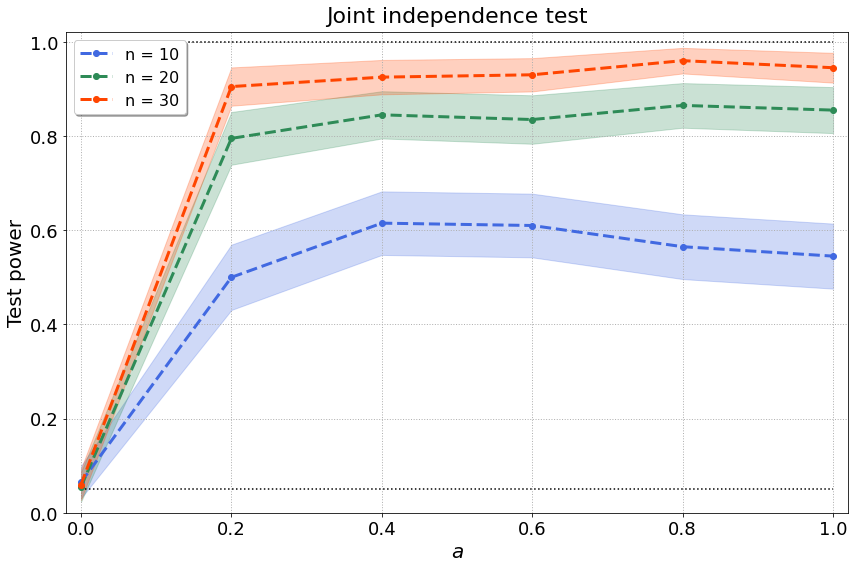

In [16]:
plot_power(type_II_errors, n_samples, a_list, n_trials, test, periods)

## Conditional independence test

In [12]:
test = 'conditional'

# number of conditional variables + samples
n_vars = [1, 2, 3, 4]
n_samples = [100, 200, 300]

# # historical dependence between X and Y is easier to detect the higher a' is
a_prime_list = [0, 0.2, 0.4, 0.6, 0.8, 1]

# range of possible values for lambda
lambs = [0.0001, 0.0002, 0.0004, 0.0006, 0.0008, 0.001, 0.002, 0.004, 0.007, 0.01, 0.012, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1]

n_pretests = 100
n_steps = 50

analyse = True

In [14]:
type_II_errors = {}
lamb_opts = {}

for p in periods:
    print('Period T:', p)
    type_II_errors[p] = {}
    lamb_opts[p] = {}
    for i_n, n_sample in enumerate(n_samples):
        print('Sample size:', int(n_sample))
        type_II_errors[p][int(n_sample)] = {}
        lamb_opts[p][int(n_sample)] = {}
        for i_d, d in enumerate(n_vars):
            print('Number of conditional variables:', d)
            type_II_errors[p][int(n_sample)][d] = []
            lamb_opts[p][int(n_sample)][d] = []
            for i_a, a_prime in enumerate(a_prime_list):
                print("a':", a_prime)
                # generate synthetic data
                X, Y, Z = generate_data(dep=test, n_samples=int(n_sample), n_trials=n_trials, n_obs=n_obs, n_preds=n_preds, period=p, n_vars=d, a=1, a_prime=a_prime, upper_limit=upper_limit, n_basis=n_basis, sd=sd)
                
                if i_a == 0:
                    lamb_opt, rejects_opt = opt_lambda(X[:n_sample], Y[:n_sample], Z[:, :n_sample, :], lambs, n_pretests, n_perms, n_steps, alpha, K='K_ID')
                    # if same sample sizes previously tested, load them
                    #l_opts = pickle.load(open('results/conditional/lambs_opt_conditional.pkl', 'rb'))
                    #lamb_opt = l_opts[d][n_sample]
                    
                # conduct n trials
                power = test_power(X=X, Y=Y, Z=Z, n_trials=n_trials, n_perms=n_perms, alpha=alpha, K='K_ID', test=test, lamb_opt=lamb_opt, analyse=analyse)
                type_II_errors[p][n_sample][d].append(power)
                lamb_opts[p][n_sample][d].append(lamb_opt)
                print('Test power:', power)
                print('----------')
            print('----------')
    print('----------')

power_hist = open('results/{}/test_power_hist_{}_{}_{}.pkl'.format(test, test, n_vars[0], n_samples[0]), 'wb')
pickle.dump(type_II_errors, power_hist)
power_hist.close()
lambs_opt_hist = open('results/{}/lambs_opt_{}_{}_{}.pkl'.format(test, test, n_vars[0], n_samples[0]), 'wb')
pickle.dump(lamb_opts, lambs_opt_hist)
lambs_opt_hist.close()

Period T: 0.1
Sample size: 100
Number of conditional variables: 3
a': 1
0.0 0.12
Test power: 0.0
----------
----------
----------
CPU times: user 6.78 s, sys: 295 ms, total: 7.07 s
Wall time: 13.9 s


"\npower_hist = open('results/{}/test_power_hist_{}_{}_{}.pkl'.format(test, test, n_vars[0], n_samples[0]), 'wb')\npickle.dump(type_II_errors, power_hist)\npower_hist.close()\nlambs_opt_hist = open('results/{}/lambs_opt_{}_{}_{}.pkl'.format(test, test, n_vars[0], n_samples[0]), 'wb')\npickle.dump(lamb_opts, lambs_opt_hist)\nlambs_opt_hist.close()\n"

In [ ]:
type_II_errors = pickle.load(open('results/{}/test_power_hist_{}.pkl'.format(test, test), 'rb'))
lamb_opts = pickle.load(open('results/{}/lambs_opt_{}.pkl'.format(test, test), 'rb'))

In [ ]:
lamb_opts

In [ ]:
plot_power(type_II_errors, n_samples, a_prime_list, n_trials, test, periods=periods, n_vars=8, lamb_opts=lamb_opts)